In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")



In [147]:
#  1-diabet hastasi 
#  0-saglikli 

df = pd.read_csv("diabetes.csv")
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [138]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'HASTALARIN DAĞILIMI')

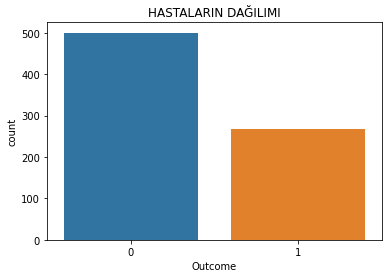

In [139]:
hasta = df[df.Outcome == 1]
saglikli = df[df.Outcome == 0]


sns.countplot(x = df['Outcome'])
plt.title('HASTALARIN DAĞILIMI')

<AxesSubplot: xlabel='Age', ylabel='Glucose'>

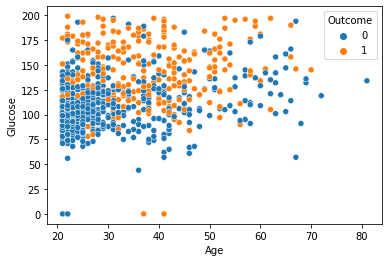

In [140]:
sns.scatterplot(data = df, x = df.Age, y = df.Glucose, hue=df.Outcome)

In [141]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome'].values

#normalizasyon
X = (X - np.min(X))/(np.max(X)-np.min(X))

# train ve test datamizi ayiriyoruz
x_train, x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)





In [142]:
# knn modelinin oluşturulması
knn =KNeighborsClassifier(n_neighbors=3) # k sayısını nasil belirlemeliyiz ?
knn.fit(x_train, y_train)
predic = knn.predict(x_test)

print('k = 3 degeri icin sonuclar : ', knn.score(x_test,y_test))

k = 3 degeri icin sonuclar :  0.7857142857142857


1 % 69.0
2 % 74.0
3 % 79.0
4 % 76.0
5 % 80.0
6 % 79.0
7 % 81.0
8 % 79.0
9 % 79.0
10 % 79.0
11 % 80.0
12 % 80.0
13 % 81.0
14 % 79.0
[0.6948051948051948, 0.7402597402597403, 0.7857142857142857, 0.7597402597402597, 0.7987012987012987, 0.7922077922077922, 0.8116883116883117, 0.7922077922077922, 0.7857142857142857, 0.7922077922077922, 0.7987012987012987, 0.7987012987012987, 0.8051948051948052, 0.7922077922077922]


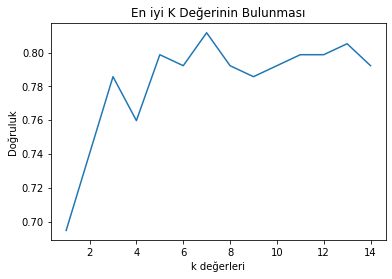

In [143]:
# k degerini kac vermeliyim 
score_list=[]
for k in range(1,15):
    knn_yeni = KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train, y_train)
    print(k ,'%',round( knn_yeni.score(x_test, y_test)*100,0))
    score_list.append(knn_yeni.score(x_test, y_test))
    
print(score_list)
plt.plot(range(1,15),score_list)
plt.xlabel("k değerleri")
plt.ylabel("Doğruluk")
plt.title("En iyi K Değerinin Bulunması")
plt.show()

In [144]:
knn =KNeighborsClassifier(n_neighbors=7) 
knn.fit(x_train, y_train)
predic = knn.predict(x_test)

print('k = 7 degeri icin sonuclar : ', knn.score(x_test,y_test))

#modeli kaydetme
pickle_out = open("knn.pkl", "wb") 
pickle.dump(knn , pickle_out) 
pickle_out.close()

k = 7 degeri icin sonuclar :  0.8116883116883117


In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred= knn.predict(x_test)   
cm= confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(x_test.shape)
print('Karışıklık Matrisi \n',cm)
print('doğruluk \n',acc)
print('f1 skoru \n',f1)

(154, 8)
Karışıklık Matrisi 
 [[90  9]
 [20 35]]
doğruluk 
 0.8116883116883117
f1 skoru 
 0.7070707070707071


In [146]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler
 
# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
#sc.fit_transform(x_train)
 
new_prediction = knn.predict(sc.fit_transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]
print('Tahmin: ',new_prediction[0])

Tahmin:  0


In [149]:
import sklearn

In [150]:
print(sklearn.__version__)

1.1.1
